In [23]:
# Stock prediction using Long Short Term Memory (LSTM)


In [47]:
# import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras_core.models import Sequential
from keras_core.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [51]:
# get stock quote
df = yf.download(tickers=['AAPL'] ,start = '2017-01-01', end = '2024-09-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.921547,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.891415,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.028164,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.329491,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.579807,134247600
...,...,...,...,...,...,...
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600
2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200


In [53]:
# get rows
df.shape


(1928, 6)

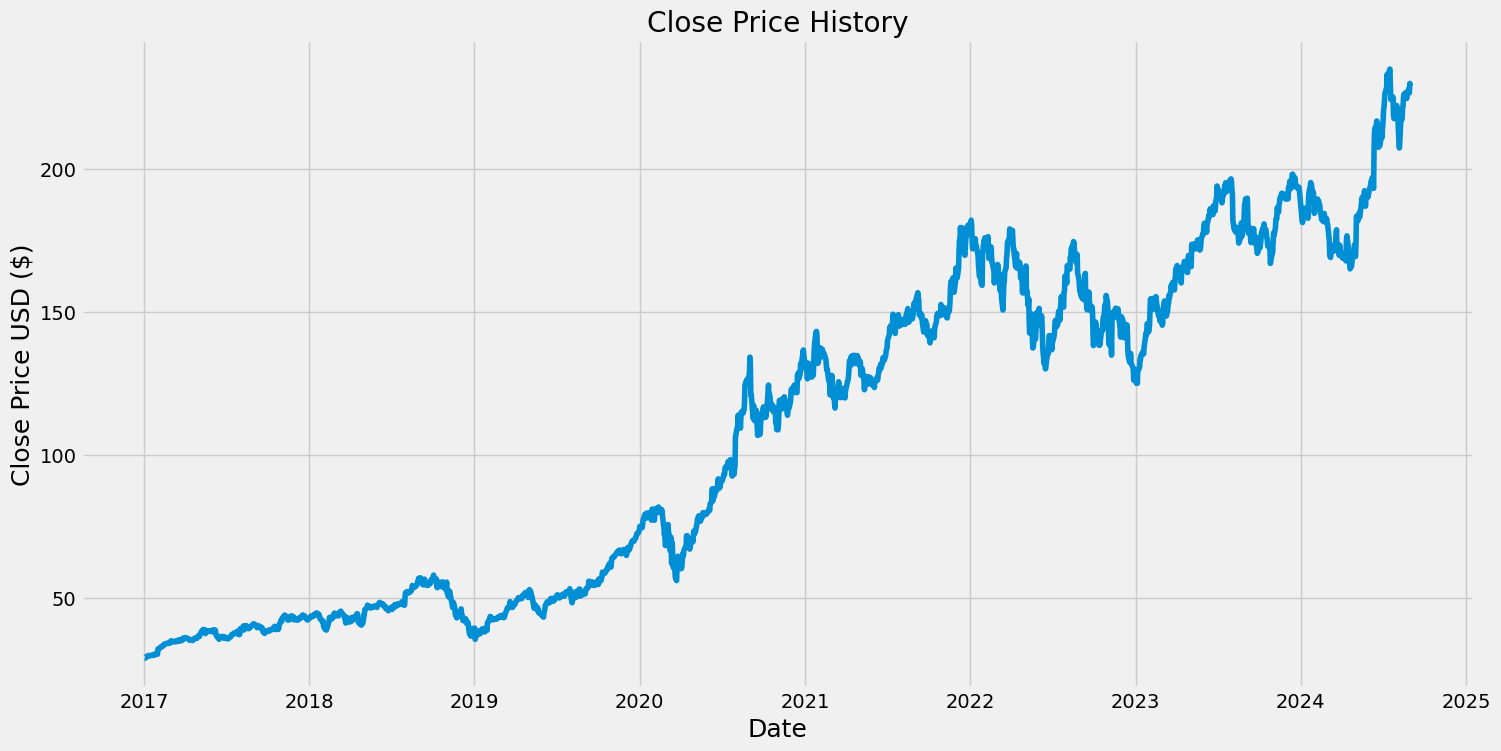

In [55]:
#visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()



In [59]:
# create a new dataframe with only close column
data = df.filter(['Close'])
# convert the dataframe to a numpy array
dataset =data.values
training_data_len = math.ceil(len(dataset)*.8)

training_data_len


1543

In [67]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.57914726e-04],
       [0.00000000e+00],
       [7.16667813e-04],
       ...,
       [9.59526752e-01],
       [9.75560509e-01],
       [9.71722143e-01]])

In [75]:

#Create scaled training dataset

train_data = scaled_data[0:training_data_len, :]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])